In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option("display.max_columns", 80)
pd.set_option("display.max_rows", 80)

In [2]:
df=pd.read_csv("EmployeeAttrition.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.00,1024.87,2.72,65.89,2.73,2.06,2.73,6502.93,14313.10,2.69,15.21,3.15,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,1.10,4707.96,7117.79,2.50,3.66,0.36,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,1009.00,2094.00,0.00,11.00,3.00,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,2.00,2911.00,8047.00,1.00,12.00,3.00,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,1020.50,3.00,66.00,3.00,2.00,3.00,4919.00,14235.50,2.00,14.00,3.00,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.00,1555.75,4.00,83.75,3.00,3.00,4.00,8379.00,20461.50,4.00,18.00,3.00,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.00,2068.00,4.00,100.00,4.00,5.00,4.00,19999.00,26999.00,9.00,25.00,4.00,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [5]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")


Age: Number of unique values 43
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 886
Department: Number of unique values 3
DistanceFromHome: Number of unique values 29
Education: Number of unique values 5
EducationField: Number of unique values 6
EmployeeCount: Number of unique values 1
EmployeeNumber: Number of unique values 1470
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 5
JobRole: Number of unique values 9
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
MonthlyRate: Number of unique values 1427
NumCompaniesWorked: Number of unique values 10
Over18: Number of unique values 1
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique values 15
PerformanceRating: Number of uni

In [6]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [7]:
object_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 30:
        object_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print("====================================")
object_col.remove('Attrition')

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Gender : ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human 

In [8]:
len(object_col)

7

In [10]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df["Attrition"] = label.fit_transform(df.Attrition)

In [11]:
disc_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() < 30:
        print(f"{column} : {df[column].unique()}")
        disc_col.append(column)
        print("====================================")
disc_col.remove('Attrition')

Attrition : [1 0]
DistanceFromHome : [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
Education : [2 1 4 3 5]
EnvironmentSatisfaction : [2 3 4 1]
JobInvolvement : [3 2 4 1]
JobLevel : [2 1 3 4 5]
JobSatisfaction : [4 2 3 1]
NumCompaniesWorked : [8 1 6 9 0 4 5 2 7 3]
PercentSalaryHike : [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]
PerformanceRating : [3 4]
RelationshipSatisfaction : [1 4 2 3]
StockOptionLevel : [0 1 3 2]
TrainingTimesLastYear : [0 3 2 5 1 4 6]
WorkLifeBalance : [1 3 2 4]
YearsInCurrentRole : [ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17]
YearsSinceLastPromotion : [ 0  1  3  2  7  4  8  6  5 15  9 13 12 10 11 14]
YearsWithCurrManager : [ 5  7  0  2  6  8  3 11 17  1  4 12  9 10 15 13 16 14]


In [12]:
cont_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() > 30:
        print(f"{column} : Minimum: {df[column].min()}, Maximum: {df[column].max()}")
        cont_col.append(column)
        print("====================================")

Age : Minimum: 18, Maximum: 60
DailyRate : Minimum: 102, Maximum: 1499
HourlyRate : Minimum: 30, Maximum: 100
MonthlyIncome : Minimum: 1009, Maximum: 19999
MonthlyRate : Minimum: 2094, Maximum: 26999
TotalWorkingYears : Minimum: 0, Maximum: 40
YearsAtCompany : Minimum: 0, Maximum: 40


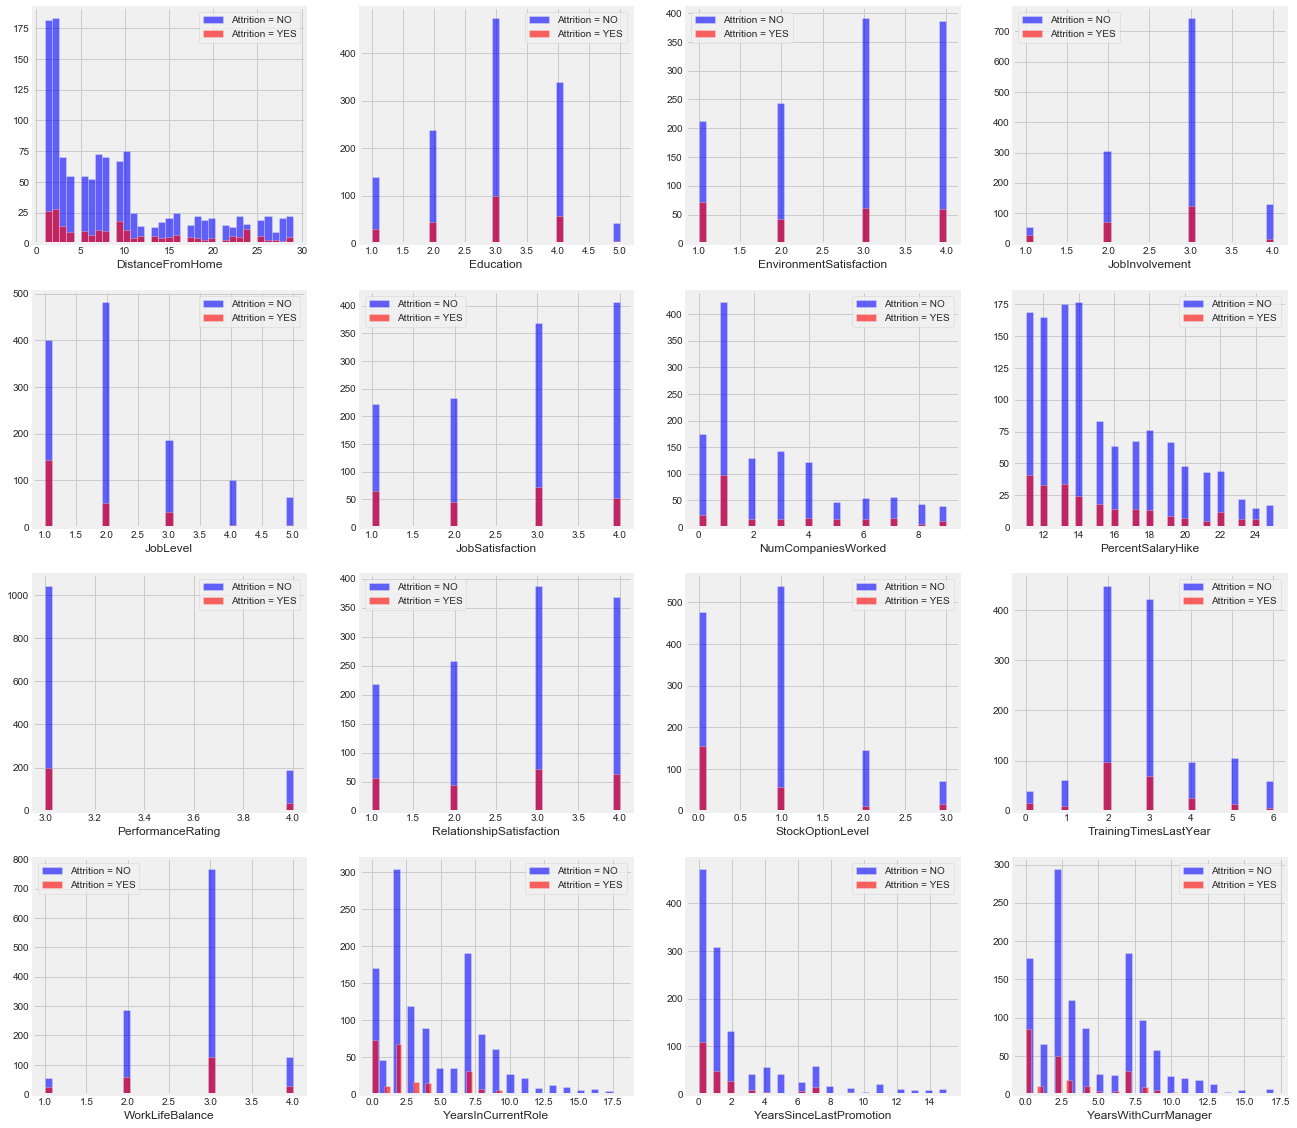

In [13]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(disc_col, 1):
    plt.subplot(4, 4, i)
    df[df["Attrition"] == 0][column].hist(bins=35, color='blue', label='Attrition = NO', alpha=0.6)
    df[df["Attrition"] == 1][column].hist(bins=35, color='red', label='Attrition = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

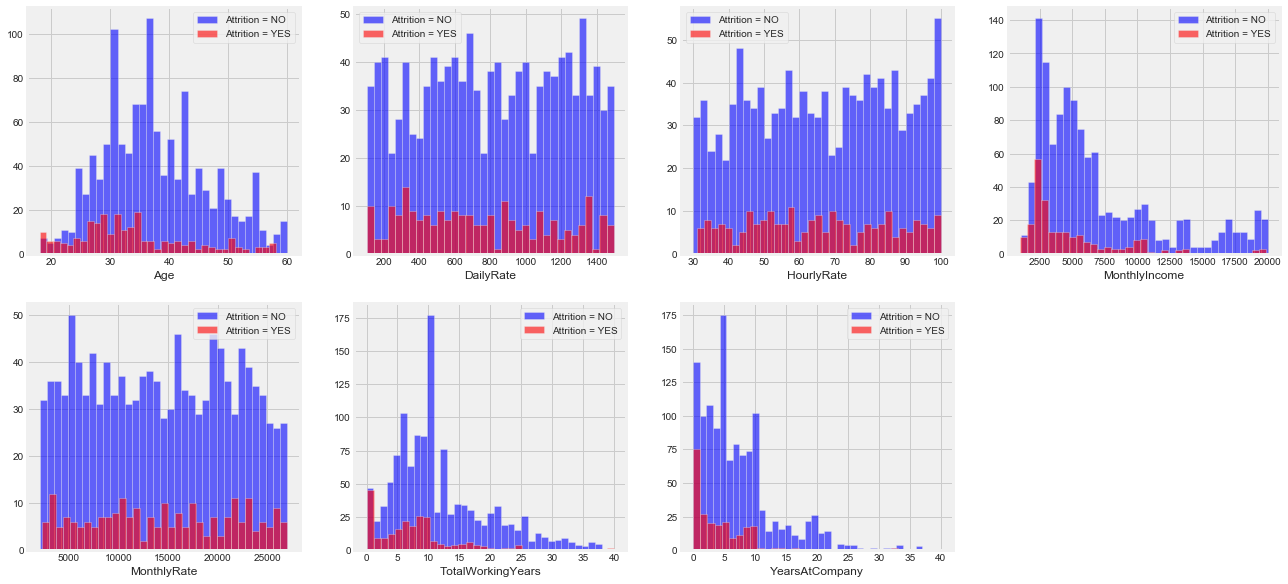

In [14]:
plt.figure(figsize=(20, 10))

for i, column in enumerate(cont_col, 1):
    plt.subplot(2, 4, i)
    df[df["Attrition"] == 0][column].hist(bins=35, color='blue', label='Attrition = NO', alpha=0.6)
    df[df["Attrition"] == 1][column].hist(bins=35, color='red', label='Attrition = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

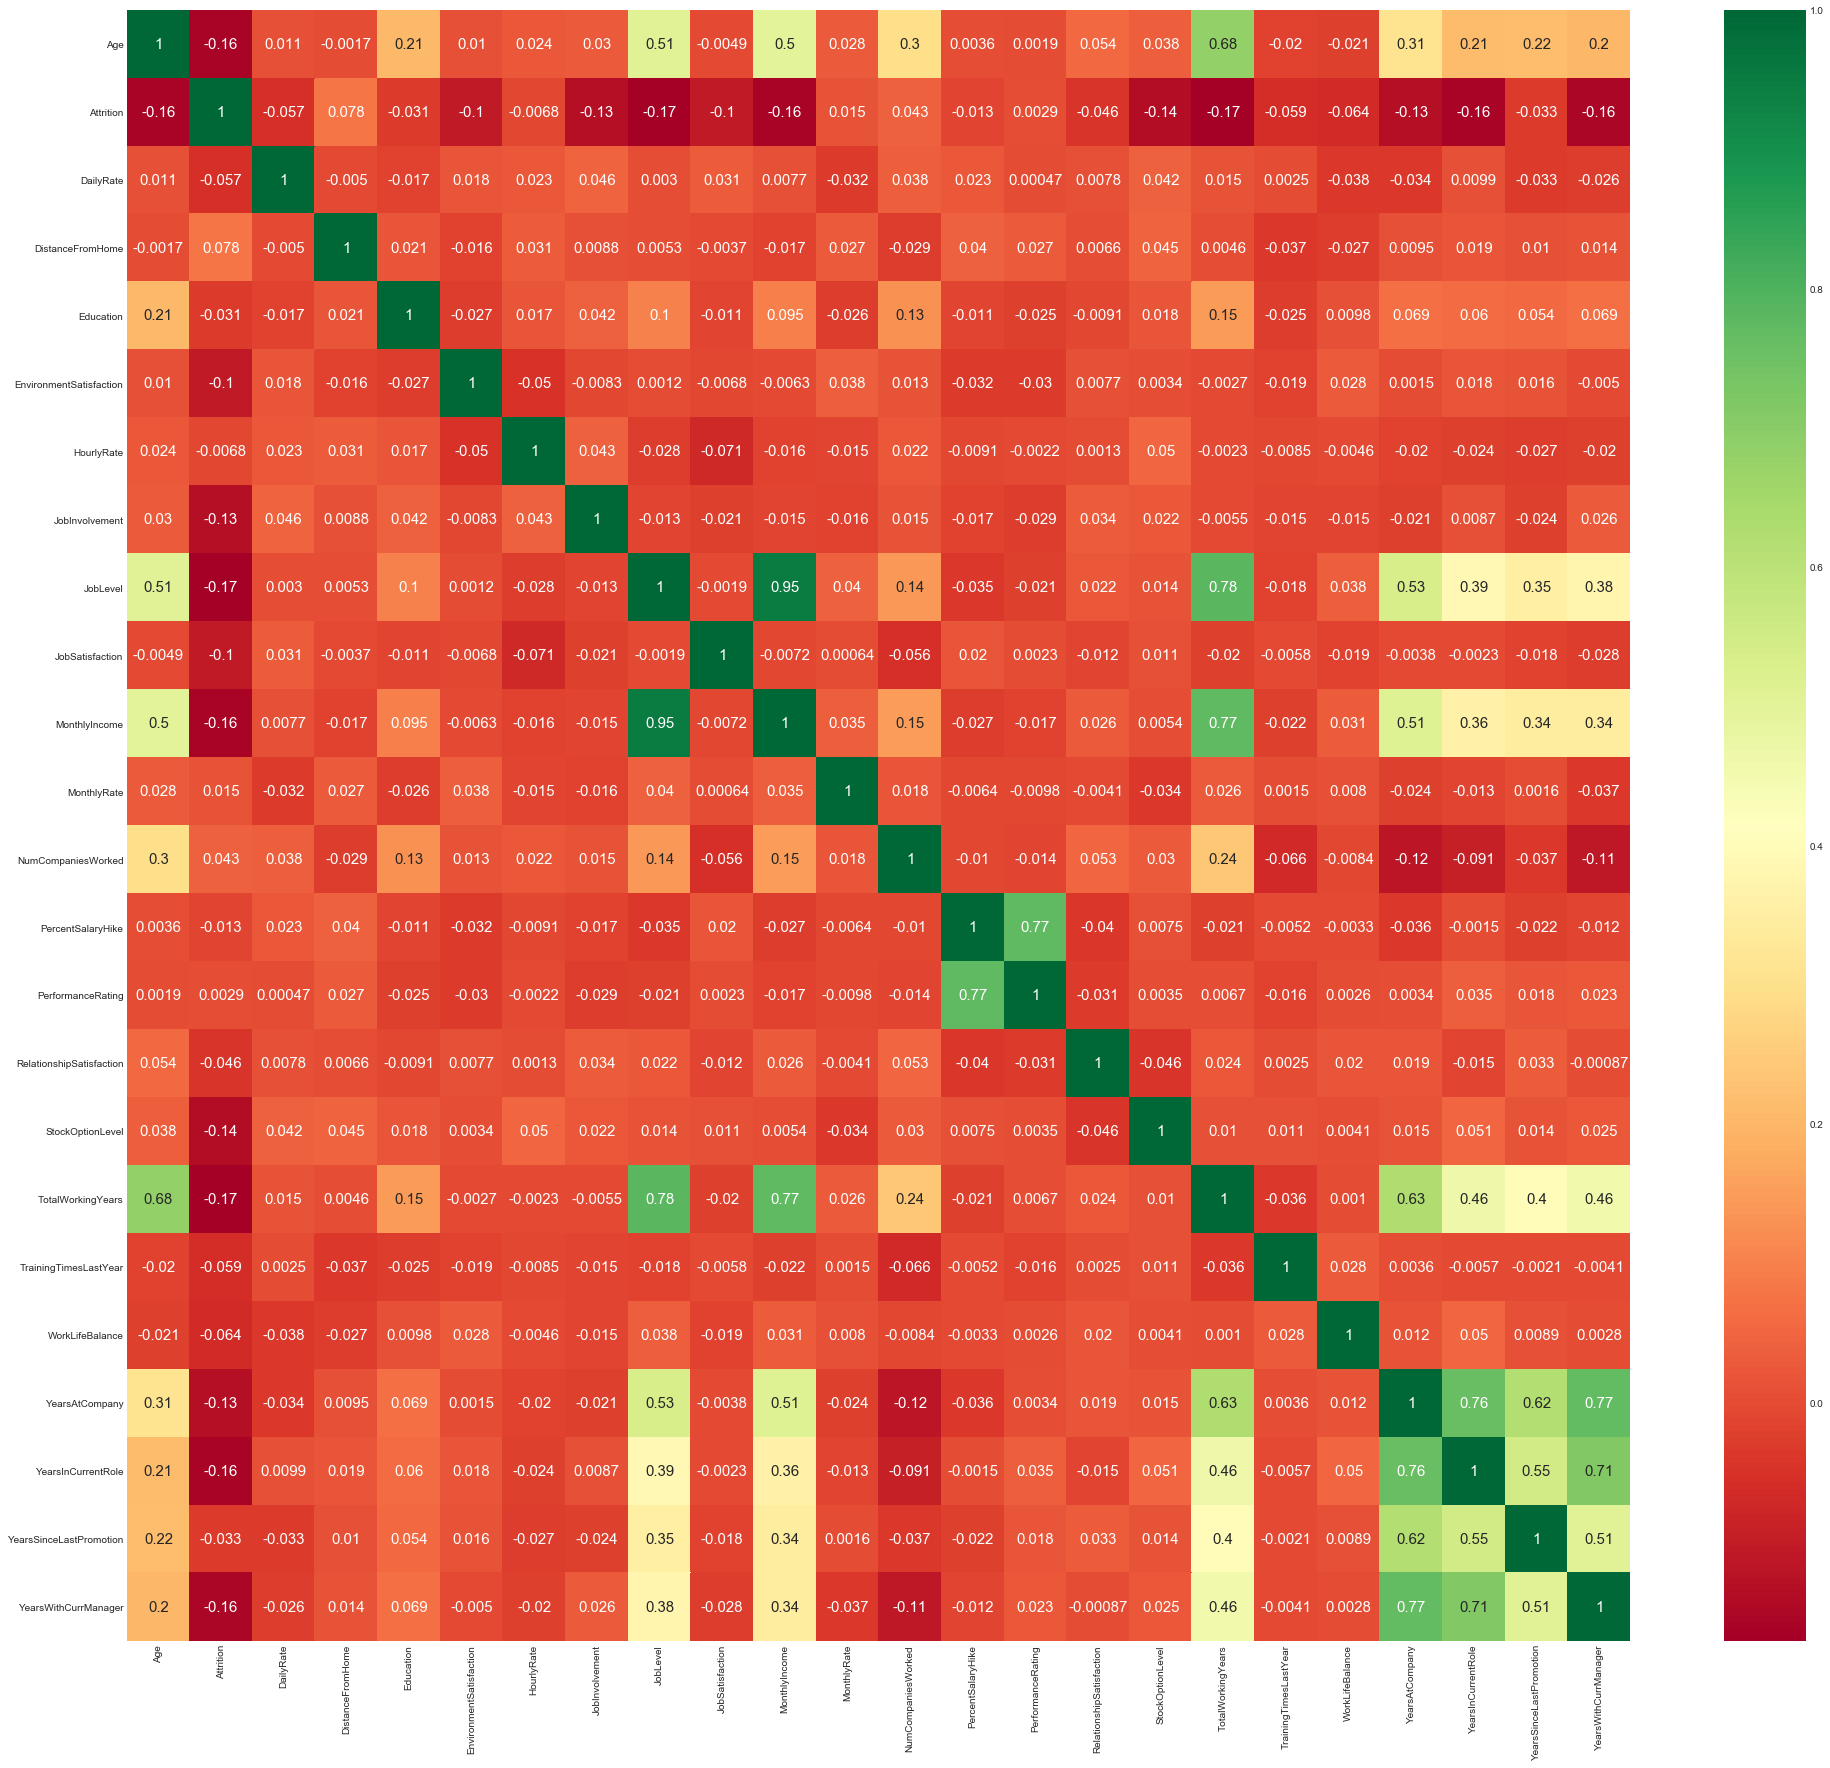

In [15]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

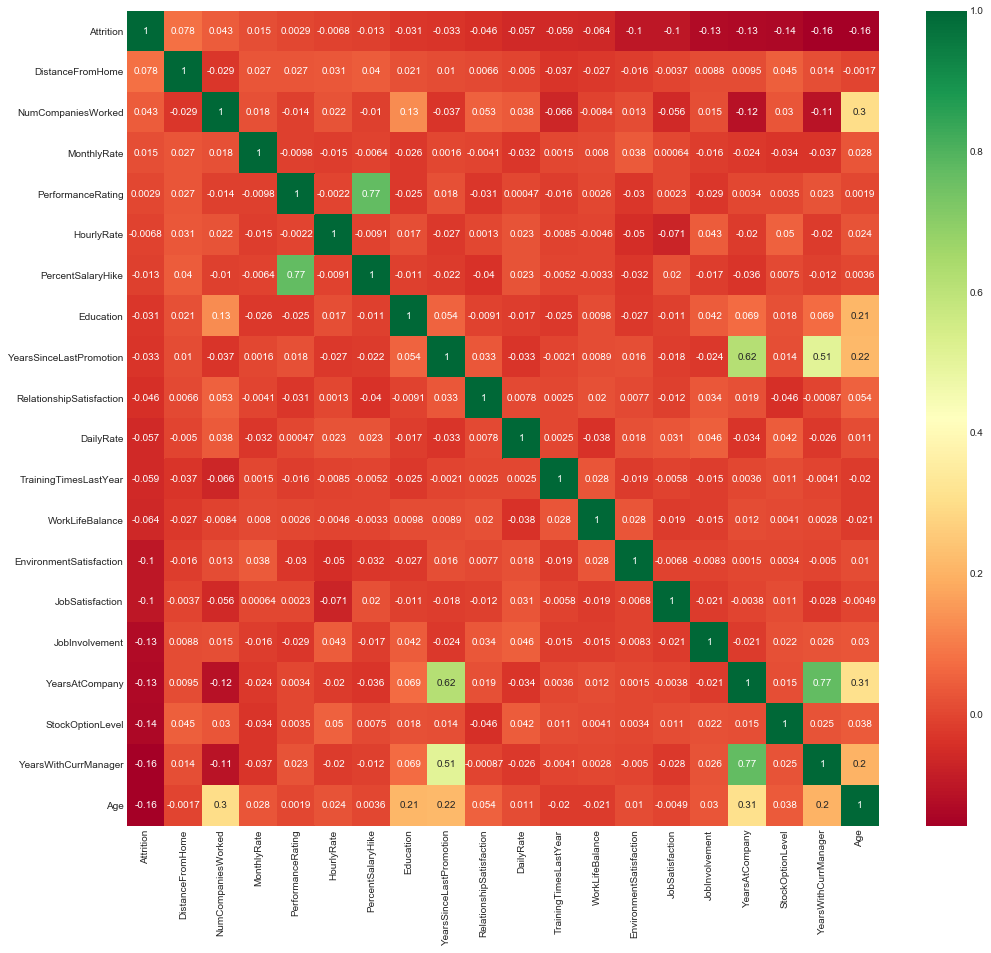

In [16]:
col = df.corr().nlargest(20, "Attrition").Attrition.index
plt.figure(figsize=(15, 15))
sns.heatmap(df[col].corr(), annot=True, cmap="RdYlGn", annot_kws={"size":10})

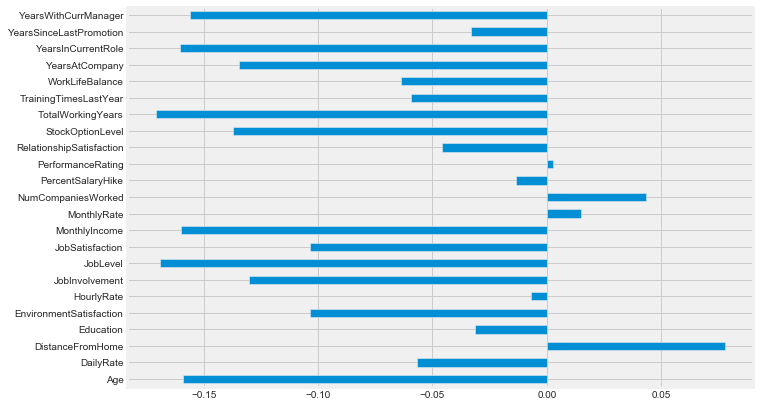

In [17]:
df.drop('Attrition', axis=1).corrwith(df.Attrition).plot(kind='barh', figsize=(10, 7))

In [18]:
df['BusinessTravel'].replace('Travel_Rarely',1, inplace=True)
df['BusinessTravel'].replace('Travel_Frequently',2, inplace=True)
df['BusinessTravel'].replace('Non-Travel',3, inplace=True)

In [19]:
df['EducationField'].replace('Life Sciences',1, inplace=True)
df['EducationField'].replace('Medical',2, inplace=True)
df['EducationField'].replace('Marketing', 3, inplace=True)
df['EducationField'].replace('Other',4, inplace=True)
df['EducationField'].replace('Technical Degree',5, inplace=True)
df['EducationField'].replace('Human Resources', 6, inplace=True)


In [20]:
df['Gender'].replace('Male',1, inplace=True)
df['Gender'].replace('Female',0, inplace=True)

In [21]:
df['Department'].replace('Research & Development',1, inplace=True)
df['Department'].replace('Sales',2, inplace=True)
df['Department'].replace('Human Resources', 3, inplace=True)

In [22]:
df['JobRole'].replace('Research Scientist',1,inplace=True)
df['JobRole'].replace('Sales Executive',2,inplace=True)
df['JobRole'].replace('Laboratory Technician',3,inplace=True)
df['JobRole'].replace('Manufacturing Director',4,inplace=True)
df['JobRole'].replace('Manager',5,inplace=True)
df['JobRole'].replace('Research Director',6,inplace=True)
df['JobRole'].replace('Healthcare Representative',7,inplace=True)
df['JobRole'].replace('Sales Representative',8,inplace=True)
df['JobRole'].replace('Human Resources',9,inplace=True)

In [25]:
df['MaritalStatus'].replace('Single',1, inplace=True)
df['MaritalStatus'].replace('Married',2, inplace=True)
df['MaritalStatus'].replace('Divorced', 3, inplace=True)

In [28]:
df['OverTime'].replace('Yes',1, inplace=True)
df['OverTime'].replace('No',0, inplace=True)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Attrition', axis=1)
y = df.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,
                                                    stratify=y)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

In [30]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

In [31]:
y_test.value_counts()[0] / y_test.shape[0]

0.8390022675736961

In [32]:
stay = (y_train.value_counts()[0] / y_train.shape)[0]
leave = (y_train.value_counts()[1] / y_train.shape)[0]

print("===============TRAIN=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

stay = (y_test.value_counts()[0] / y_test.shape)[0]
leave = (y_test.value_counts()[1] / y_test.shape)[0]

print("===============TEST=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

===============TRAIN=================
Staying Rate: 83.87%
Leaving Rate: 16.13%
===============TEST=================
Staying Rate: 83.90%
Leaving Rate: 16.10%


In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [34]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(solver='liblinear', penalty='l1')
lr_classifier.fit(X_train_std, y_train)

print_score(lr_classifier, X_train_std, y_train, X_test_std, y_test, train=True)
print_score(lr_classifier, X_train_std, y_train, X_test_std, y_test, train=False)

Train Result:
Accuracy Score: 88.82%
_______________________________________________
Classification Report:	Precision Score: 79.31%
			Recall Score: 41.57%
			F1 score: 54.55%
_______________________________________________
Confusion Matrix: 
 [[845  18]
 [ 97  69]]

Test Result:
Accuracy Score: 86.62%
_______________________________________________
Classification Report:	Precision Score: 68.75%
			Recall Score: 30.99%
			F1 score: 42.72%
_______________________________________________
Confusion Matrix: 
 [[360  10]
 [ 49  22]]

